# Задача 

 по Fashion-MNIST мы выполним полный цикл обучения модели компьютерного зрения:

- Загрузить Fashion-MNIST, разобьём на train / val / test.

- Построить простую свёрточную сеть (CNN).

- Обучить модель и будем мониторить loss/accuracy на train и val.

- Построить графики обучения (loss и accuracy).

- Визуализировать матрицы ошибок (confusion matrix) для val и test.



In [1]:
# Импорты и базовые настройки
import os, random, time
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split, Subset
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Воспроизводимость
SEED = 42
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Устройство
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device


device(type='cuda')

# Данные: загрузка Fashion-MNIST и разбиение на train/val/test

- Fashion-MNIST содержит 60k тренировочных и 10k тестовых изображений 28×28 (1 канал).

- нормализовать изображения (mean=0.5, std=0.5 → пиксели в диапазоне примерно [-1, 1]).

- Разобить стандартный train(60k) на train(50k) и val(10k); test (10k) оставим как есть.

In [ ]:
# Путь к данным (можно указать свой)
DATA_DIR = ""

# Трансформации: ToTensor + Normalize
mean, std = 0.5, 0.5
train_tfms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((mean,), (std,))
])
test_tfms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((mean,), (std,))
])

# Загрузка датасетов
full_train = torchvision.datasets.FashionMNIST(root=DATA_DIR, train=True,  download=True, transform=train_tfms)
test_data = torchvision.datasets.FashionMNIST(root=DATA_DIR, train=False, download=True, transform=test_tfms)

# Разбиение train -> train/val (50k/10k)
train_size = 50_000
val_size   = len(full_train) - train_size
train_data, val_data = 

# Лоадеры
BATCH_TRAIN = 
BATCH_TEST  = 

train_loader = 
val_loader   = 
test_loader  = 

# Имена классов (из документации Fashion-MNIST)
classes = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

len(train_data), len(val_data), len(test_data), classes


100%|██████████| 26.4M/26.4M [00:14<00:00, 1.77MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 422kB/s]
100%|██████████| 4.42M/4.42M [00:02<00:00, 1.60MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 4.79MB/s]


(50000,
 10000,
 10000,
 ['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'])

# Быстрая проверка данных

Визуализируем несколько изображений из train/val/test, чтобы убедиться, что данные корректные (форма, метки, нормализация).

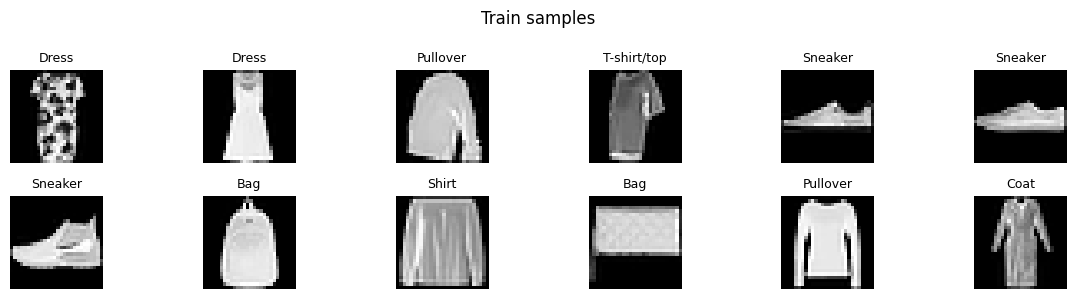

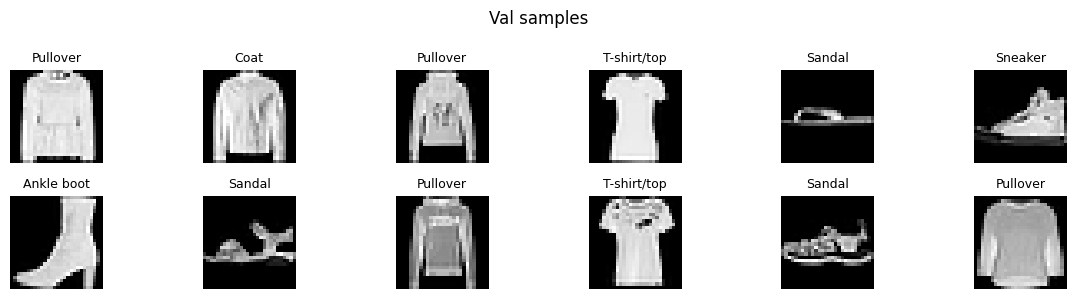

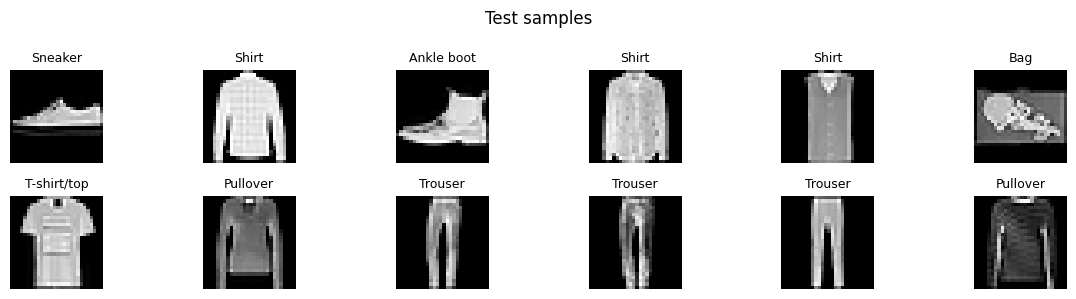

In [ ]:
def show_batch(dataset, n=12, title="Примеры изображений"):
    idxs = np.random.choice(len(dataset), size=n, replace=False)
    plt.figure(figsize=(12,3))
    for i, idx in enumerate(idxs, 1):
        # dataset для random_split возвращает (img, label) через Subset -> обращаемся напрямую
        img, label = 
        img_show =  # денормализация для показа
        plt.subplot(2, n//2, i)
        plt.imshow(img_show.squeeze(0), cmap="gray")
        plt.title(classes[int(label)], fontsize=9)
        plt.axis("off")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

show_batch(train_data, title="Train samples")
show_batch(val_data,   title="Val samples")
show_batch(test_data,  title="Test samples")


# Модель: простая CNN

Архитектура (лёгкая и быстрая для Fashion-MNIST):

- Conv(1→32, 3×3) → ReLU → MaxPool(2×2) → получаем 32×14×14

- Conv(32→64, 3×3) → ReLU → MaxPool(2×2) → 64×7×7

- Flatten → Linear(64*7*7 → 128) → ReLU → Dropout(0.2) → Linear(128 → 10)


Лучше придусать свою

In [ ]:
class SimpleFashionCNN(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        # Блок 1
        self.conv1 =  # (B,32,28,28)
        self.pool  =  # (B,32,14,14)
        # Блок 2
        self.conv2 =  # (B,64,14,14) -> pool -> (B,64,7,7)
        # Полносвязная часть
        self.fc1 = 
        self.fc2 = 
        self.dropout = 

    def forward(self, x):
        # Фича-экстракция
         x = 


        # Классификатор
        x = 
        logits = self.fc2(x)
        return logits

model = SimpleFashionCNN().to(device)
print(model)
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Trainable params: {total_params/1e6:.2f}M")


SimpleFashionCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)
Trainable params: 0.42M


# Обучение: loss/optimizer/цикл

Loss: CrossEntropyLoss.

Optimizer: Adam (lr=1e-3).

По эпохам считаем loss и accuracy для train и val.

Сохраняем историю для графиков.

In [ ]:
criterion = 
optimizer = 

def run_epoch(loader, train=True):
    """
    Один проход по данным.
    Возвращает средний loss и accuracy.
    """
    if train:
        model.train()
    else:
        model.eval()

    losses, y_true, y_pred = [], [], []
    for xb, yb in loader:
        xb, yb = xb.to(device), yb.to(device)
        with torch.set_grad_enabled(train):
            logits = 
            loss = 
            if train:
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
        # логирование
        losses.append(loss.item())
        y_true.append(yb.detach().cpu())
        y_pred.append(logits.argmax(1).detach().cpu())

    y_true = torch.cat(y_true).numpy()
    y_pred = torch.cat(y_pred).numpy()
    acc = accuracy_score(y_true, y_pred)
    return np.mean(losses), acc

EPOCHS = 20  # можно увеличить до 12-15 при желании
history = []
for ep in range(1, EPOCHS+1):
    t0 = time.time()
    tr_loss, tr_acc = run_epoch(train_loader, train=True)
    val_loss, val_acc = run_epoch(val_loader,   train=False)
    dt = time.time() - t0
    history.append((ep, tr_loss, tr_acc, val_loss, val_acc))
    print(f"Epoch {ep:02d} | "
          f"train: loss={tr_loss:.4f}, acc={tr_acc:.3f} | "
          f"val:   loss={val_loss:.4f}, acc={val_acc:.3f} | "
          f"{dt:.1f}s")


Epoch 01 | train: loss=0.5493, acc=0.801 | val:   loss=0.3471, acc=0.872 | 3.6s
Epoch 02 | train: loss=0.3446, acc=0.875 | val:   loss=0.2995, acc=0.889 | 2.2s
Epoch 03 | train: loss=0.2942, acc=0.893 | val:   loss=0.2828, acc=0.897 | 2.2s
Epoch 04 | train: loss=0.2620, acc=0.904 | val:   loss=0.2526, acc=0.907 | 2.4s
Epoch 05 | train: loss=0.2362, acc=0.914 | val:   loss=0.2381, acc=0.910 | 2.2s
Epoch 06 | train: loss=0.2184, acc=0.920 | val:   loss=0.2279, acc=0.915 | 2.3s
Epoch 07 | train: loss=0.1995, acc=0.927 | val:   loss=0.2182, acc=0.919 | 2.3s
Epoch 08 | train: loss=0.1841, acc=0.932 | val:   loss=0.2140, acc=0.921 | 2.3s
Epoch 09 | train: loss=0.1686, acc=0.938 | val:   loss=0.2147, acc=0.922 | 2.3s
Epoch 10 | train: loss=0.1535, acc=0.944 | val:   loss=0.2135, acc=0.925 | 2.2s
Epoch 11 | train: loss=0.1413, acc=0.948 | val:   loss=0.2207, acc=0.922 | 2.3s
Epoch 12 | train: loss=0.1303, acc=0.951 | val:   loss=0.2148, acc=0.924 | 2.3s
Epoch 13 | train: loss=0.1189, acc=0.955

# Графики обучения: train/val loss и accuracy

Построим 2 графика, чтобы визуально оценить динамику сходимости и наличие/отсутствие переобучения.

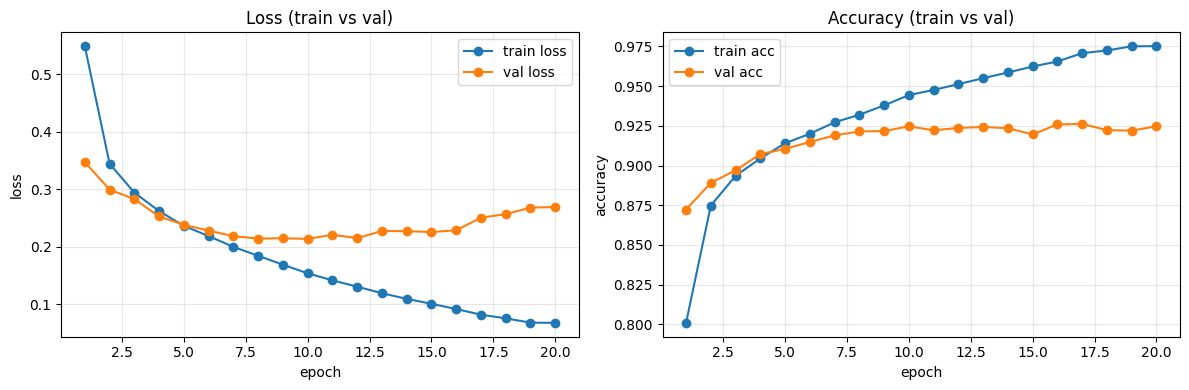

In [ ]:
# Разбор истории
ep, tr_l, tr_a, va_l, va_a = zip(*history)

plt.figure(figsize=(12,4))

# Loss
plt.subplot(1,2,1)


# Accuracy
plt.subplot(1,2,2)


plt.tight_layout()
plt.show()


# Матрица ошибок (Confusion Matrix) для валидации

Соберём предсказания на val и построим confusion matrix, чтобы понять, какие классы чаще путаются.

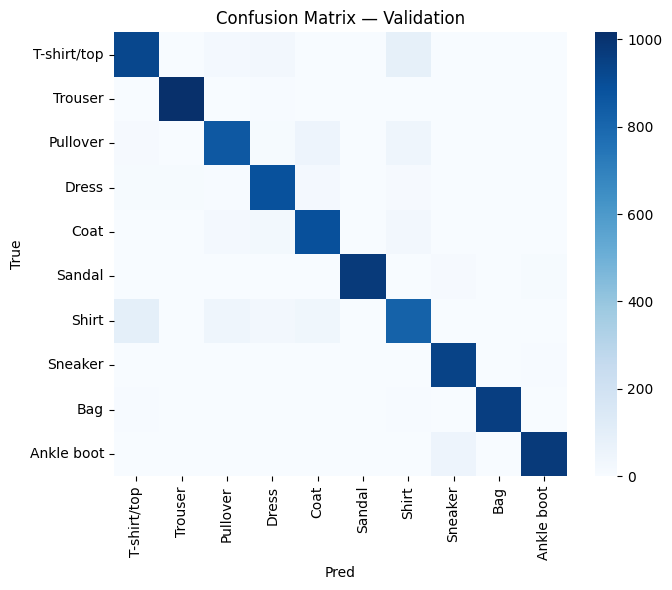

Per-class accuracy (val):
 T-shirt/top: 0.861
     Trouser: 0.989
    Pullover: 0.872
       Dress: 0.939
        Coat: 0.916
      Sandal: 0.974
       Shirt: 0.792
     Sneaker: 0.989
         Bag: 0.981
  Ankle boot: 0.945


In [ ]:
# Предсказания на val
model.eval()


# Матрица ошибок (val)
cm_val = 

# Per-class accuracy (val)
per_class_acc_val = (cm_val.diagonal() / cm_val.sum(axis=1)).round(3)
print("Per-class accuracy (val):")
for cls, acc in zip(classes, per_class_acc_val):
    print(f"{cls:>12}: {acc:.3f}")


# Матрица ошибок для теста и итоговая метрика

Делаем то же самое для тестового набора, чтобы получить финальную оценку качества после выбора гиперпараметров по валидации.

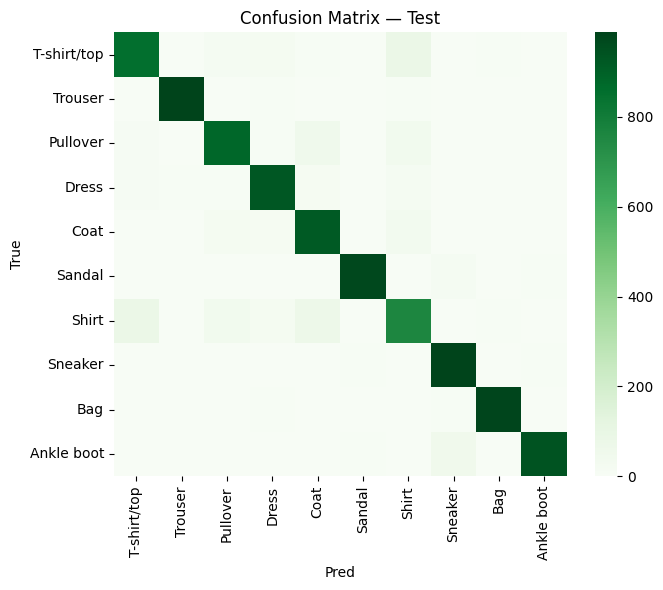

Test accuracy: 0.9225
Per-class accuracy (test):
 T-shirt/top: 0.856
     Trouser: 0.986
    Pullover: 0.883
       Dress: 0.928
        Coat: 0.921
      Sandal: 0.976
       Shirt: 0.763
     Sneaker: 0.988
         Bag: 0.983
  Ankle boot: 0.941


In [ ]:
# Предсказания на test
test_true, test_pred = [], []
model.eval()

# Матрица ошибок (test)
cm_test = confusion_matrix(test_true, test_pred)


# Accuracy (test) и per-class (test)
test_acc = accuracy_score(test_true, test_pred)
print(f"Test accuracy: {test_acc:.4f}")

per_class_acc_test = (cm_test.diagonal() / cm_test.sum(axis=1)).round(3)
print("Per-class accuracy (test):")
for cls, acc in zip(classes, per_class_acc_test):
    print(f"{cls:>12}: {acc:.3f}")


# **выводы по результатам** 

### Что видно по обучению ?

### Что видно по матрицам ошибок (val и test )?

### Что улучшать в первую очередь?

### Ожидаемый эффект?

